# Problem 🤔🤔🤔

In this project, our **business objective** is to enhance the matchmaking process in speed dating events by implementing a recommendation system. To achieve this, we aim to predict the outcome of a specific speed dating session based on the profiles of the individuals involved. This prediction will enable us to identify potential successful matches more accurately.

**Definition:** The problem we are addressing is a binary classification task: given data describing a dating session, we seek to predict the probability (0-1, float) that the dating session will lead to a successful match..

**Input:**
The input comprises data samples containing information about the dating session, including attributes related to the profiles of the participants.

**Output:**
The output is the probability (0-1, float) that the dating session will lead to a successful match.

**What data mining function is required?**
This task entails a binary classification problem, necessitating the application of supervised learning techniques.

**What could be the challenges?**
Several challenges may arise during the implementation of this recommendation system. Firstly, the dataset contains a significant number of missing values, requiring careful consideration and tuning of strategies for missing value replacement. Additionally, the dataset is highly unbalanced, with most instances resulting in unmatched dating sessions. Addressing this class imbalance is crucial to ensure the model's effectiveness in predicting successful matches. Furthermore, optimizing the entire workflow from data preprocessing to model training as a single pipeline presents another challenge, necessitating careful parameter tuning and optimization.

**What is the impact?**
The successful development and deployment of this recommendation system can significantly enhance the matchmaking process in speed dating events, leading to increased participant satisfaction and improved overall event outcomes. By accurately predicting the likelihood of successful matches, event organizers can better pair compatible individuals, thereby fostering meaningful connections and potentially increasing attendee retention rates.

**What is an ideal solution?**
An ideal solution would involve the development of a robust pipeline that seamlessly integrates data preprocessing, model training, and hyperparameter optimization. This pipeline should include effective strategies for handling missing values and addressing class imbalance. Furthermore, the selection and fine-tuning of appropriate classification algorithms should be guided by rigorous experimentation and evaluation metrics. Ultimately, the ideal solution would yield a recommendation system capable of accurately predicting the successful matches in speed dating sessions, thereby optimizing matchmaking outcomes and enhancing participant experiences.

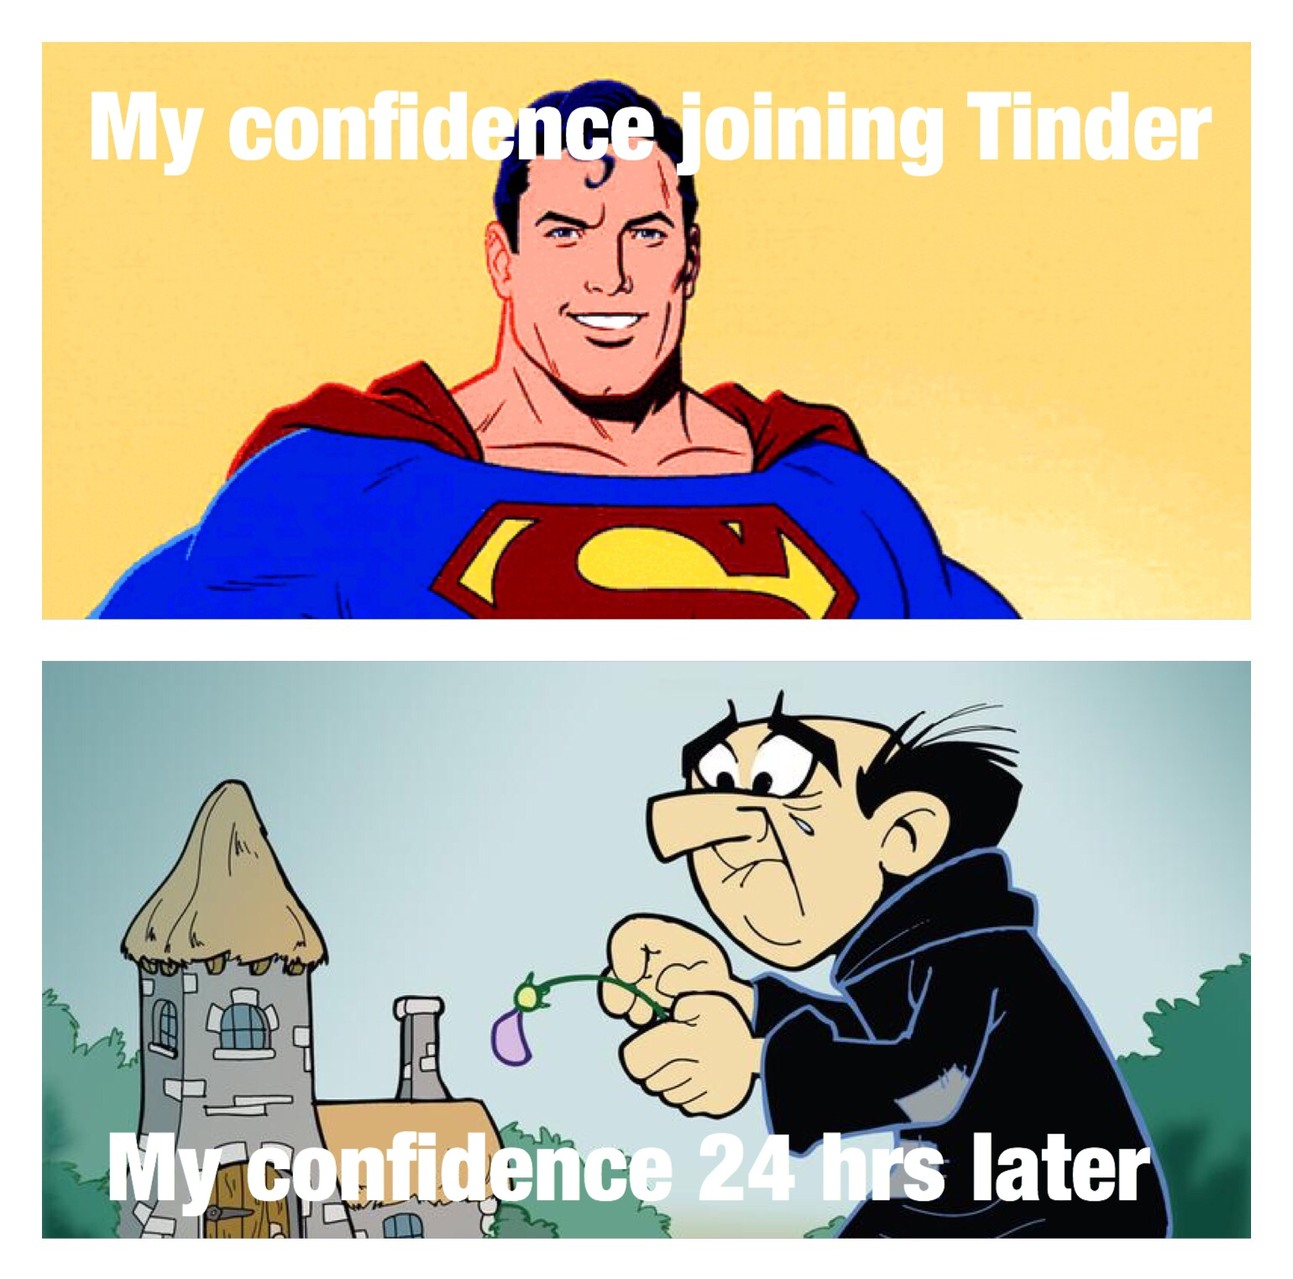

Questions related to data mining course

🌈 Why a simple linear regression model (without any activation function) is not good for classification task, compared to Perceptron/Logistic regression?

To put it simply, linear regression works well for predicting continuous values but falls short when it comes to classification tasks. This is because it can give results outside the expected range, doesn't always follow assumptions, is easily influenced by outliers, and can be difficult to interpret. Perceptron and logistic regression, on the other hand, are specifically designed for classification and perform better in these scenarios due to their activation functions.

🌈What's a decision tree and how it is different to a logistic regression model?

Decision trees make decisions based on feature thresholds, forming a tree-like structure, logistic regression models the probability of belonging to a class using a logistic function. Decision trees are easy to interpret but may overfit the training data, while logistic regression provides probabilistic outputs suitable for classification tasks.

🌈What's the difference between grid search and random search?

Search Strategy: Grid search systematically explores all combinations of hyperparameters, while random search randomly samples combinations.
Efficiency: Random search can be more efficient than grid search when the search space is large or when only a few hyperparameters significantly impact performance.
Computation Time: Grid search can be computationally expensive, especially for high-dimensional hyperparameter spaces, whereas random search is more computationally efficient.
Effectiveness: Random search may be more effective in finding good hyperparameter values, especially in high-dimensional or complex search spaces, as it allows exploration of a wider range of hyperparameter combinations.

🌈What's the difference between bayesian search and random search?

Search Strategy: Random search samples hyperparameter values randomly, while Bayesian optimization uses a probabilistic model to guide the search.
Efficiency: Bayesian optimization is typically more sample-efficient than random search, requiring fewer evaluations to find good hyperparameter values.
Exploration vs. Exploitation: Random search explores the search space uniformly, while Bayesian optimization balances exploration and exploitation to focus on promising regions of the search space.
Objective Function Model: Bayesian optimization builds a probabilistic model of the objective function, allowing it to make informed decisions about which hyperparameter values to evaluate next.


# Notebook Structure

Through the notebook we will go through the data science life cycle to achieve results.

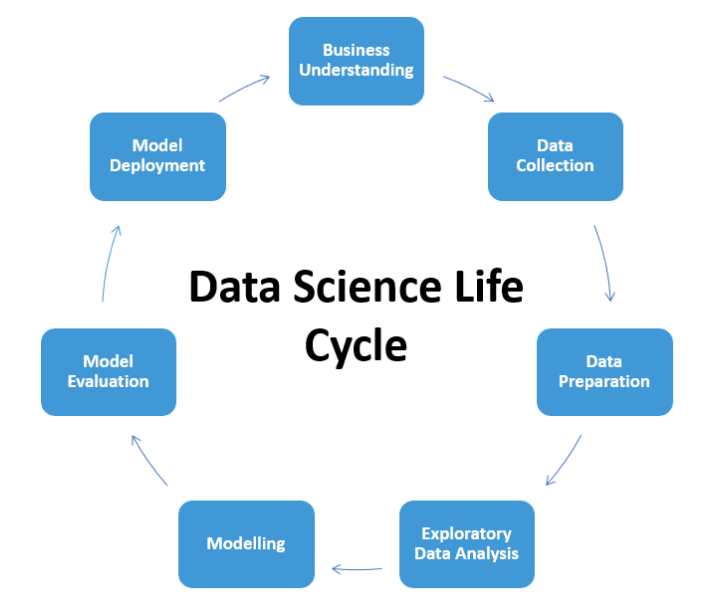

So, after understanding the problem and its imapct let's explore the data we have. 🤓👀

# Setting up environment

In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 2.7 MB/s eta 0:00:00


In [ ]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 5.8 MB/s eta 0:00:00


In [ ]:
# import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.decomposition import PCA
from pca import pca



In [ ]:
# set some configs

pd.set_option('display.max_columns', None)

# Data

The goal of the data we have is to mimic the data on dating apps. Our data was collected during a speed dating event.

We can see the data as 4 main inputs:
1. **signup/Time1**: [Survey filled out by students that are interested in participating in order to register for the event.]
2. **Scorecard**: [Filled out by subjects after each "date" during the event.]
3. **followup/Time2**: [Survey is filled out the day after participating in the event. Subjects must have submitted this in order to be sent their matches.]
4. **followup2/Time3**: [Subjects filled out 3-4 weeks after they had been sent their matches]


## Data Collection

In [ ]:
!unzip /content/train.csv.zip

Archive:  /content/train.csv.zip
  inflating: train.csv               


In [162]:
# read the data
df = pd.read_csv('/content/train.csv')

In [ ]:
df.head()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,3,2,14,18,2,2.0,14,12,372.0,0,-0.03,0,27.0,2.0,30.00,15.00,15.00,20.00,5.00,15.00,7.0,7.0,7.0,6.0,5.0,NaN,7.0,1.0,2.0,33.0,Ed.D. in higher education policy at TC,9.0,University of Michigan-Ann Arbor,"1,290.00","21,645.00",3.0,2.0,1.0,"Palo Alto, CA",NaN,NaN,1.0,6.0,3.0,University President,2.0,3.0,4.0,4.0,10.0,9.0,10.0,1.0,1.0,8.0,7.0,10.0,8.0,10.0,1.0,4.0,10.0,4.0,2.0,NaN,40.00,15.00,25.00,5.00,15.00,0.00,55.0,10.0,5.0,15.0,5.0,10.0,70.00,5.00,5.00,15.00,5.00,0.00,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,6.0,5.0,7.0,6.0,6.0,NaN,6.0,4.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,60.0,10.0,10.0,10.0,10.0,0.0,45.0,25.0,5.0,25.0,0.0,0.0,65.00,5.00,5.00,25.00,0.00,0.00,10.0,10.0,10.0,9.0,10.0,10.0,9.0,10.0,9.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2583
1,1,14,1,3,10,2,NaN,8,8,63.0,0,0.21,0,24.0,4.0,5.00,15.00,45.00,25.00,0.00,10.00,3.0,8.0,5.0,3.0,7.0,1.0,1.0,3.0,2.0,22.0,Engineering,5.0,NaN,NaN,NaN,2.0,8.0,1.0,"Boston, MA","2,021",NaN,5.0,6.0,1.0,Engineer or iBanker or consultant,7.0,8.0,3.0,7.0,10.0,6.0,6.0,7.0,2.0,9.0,5.0,6.0,7.0,7.0,6.0,8.0,8.0,4.0,7.0,9.0,21.00,20.00,19.00,20.00,10.00,10.00,NaN,NaN,NaN,NaN,NaN,NaN,30.00,15.00,10.00,20.00,10.00,15.00,7.0,9.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,5.0,8.0,8.0,5.0,7.0,6.0,6.0,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,22.0,17.0,17.0,17.0,10.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,7.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,20.00,20.00,15.00,20.00,10.00,15.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6830
2,1,14,1,13,10,8,8.0,10,10,331.0,0,0.43,0,34.0,2.0,15.00,15.00,10.00,25.00,10.00,25.00,4.0,8.0,7.0,4.0,7.0,3.0,3.0,2.0,2.0,27.0,Urban Planning,5.0,"Rizvi College of Architecture, Bombay University",NaN,NaN,6.0,1.0,1.0,"Bombay, India",NaN,NaN,1.0,4.0,2.0,Real Estate Consulting,7.0,4.0,2.0,7.0,6.0,8.0,8.0,8.0,6.0,6.0,8.0,4.0,10.0,10.0,7.0,7.0,5.0,10.0,2.0,NaN,10.00,20.00,25.00,20.00,20.00,5.00,25.0,5.0,20.0,25.0,10.0,15.0,25.00,10.00,20.00,25.00,10.00,10.00,7.0,9.0,7.0,9.0,10.0,7.0,9.0,9.0,7.0,9.0,6.0,5.0,7.0,5.0,7.0,6.0,6.0,5.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,15.0,20.0,20.0,15.0,20.0,10.0,25.0,15.0,10.0,25.0,10.0,15.0,15.00,20.00,20.00,20.00,15.00,10.00,7.0,9.0,9.0,8.0,10.0,7.0,9.0,8.0,7.0,9.0,NaN,NaN,

In [ ]:
df.tail()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
5904,0,1,2,9,20,2,2.0,18,1,214.0,0,-0.22,1,23.0,2.0,17.02,21.28,17.02,21.28,14.89,8.51,7.0,8.0,6.0,7.0,8.0,3.0,5.0,4.0,2.0,24.0,Clinical Psychology,3.0,NaN,NaN,NaN,2.0,9.0,9.0,New York,"11,803","65,708.00",3.0,3.0,2.0,Psychologist,3.0,8.0,6.0,6.0,9.0,6.0,6.0,4.0,8.0,7.0,9.0,9.0,6.0,9.0,5.0,7.0,9.0,4.0,7.0,NaN,16.00,16.00,20.00,16.00,18.00,14.00,10.0,7.0,8.0,9.0,7.0,9.0,20.00,12.00,16.00,20.00,14.00,18.00,9.0,10.0,8.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,7.0,8.0,10.0,8.0,10.0,7.0,7.0,5.0,2.0,1.0,18.87,18.87,18.87,13.21,16.98,13.21,10.0,10.0,10.0,8.0,10.0,6.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,18.18,18.18,18.18,14.55,18.18,12.73,10.0,8.0,8.0,10.0,9.0,9.0,18.87,13.21,15.09,18.87,15.09,18.87,10.0,10.0,10.0,8.0,10.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,16.98,18.87,18.87,15.09,16.98,13.21,NaN,NaN,NaN,NaN,NaN,NaN,10.0,7.0,8.0,9.0,9.0,8.0,10.0,7.0,7.0,10.0,8.0,NaN,12.0,12.0,12.0,9.0,12.0,NaN,NaN,NaN,NaN,NaN,3390
5905,1,24,2,9,20,19,15.0,5,6,199.0,0,0.08,0,30.0,2.0,17.50,17.50,20.00,12.50,20.00,12.50,7.0,10.0,8.0,6.0,7.0,2.0,8.0,9.0,2.0,28.0,MBA,8.0,NaN,NaN,NaN,3.0,4.0,9.0,Colombia,NaN,NaN,1.0,7.0,2.0,Consulting,7.0,10.0,8.0,3.0,8.0,8.0,8.0,7.0,3.0,9.0,8.0,8.0,9.0,7.0,9.0,9.0,2.0,6.0,4.0,NaN,14.71,14.71,14.71,14.71,20.59,20.59,8.0,6.0,4.0,5.0,6.0,7.0,19.51,14.63,19.51,19.51,12.20,14.63,5.0,9.0,7.0,6.0,7.0,NaN,NaN,NaN,NaN,NaN,5.0,6.0,8.0,5.0,5.0,5.0,5.0,5.0,2.0,NaN,17.39,15.22,15.22,19.57,17.39,15.22,5.0,9.0,7.0,8.0,8.0,6.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,16.33,18.37,16.33,18.37,16.33,14.29,9.0,8.0,8.0,7.0,8.0,8.0,18.75,16.67,18.75,16.67,14.58,14.58,6.0,9.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4130
5906,0,13,2,11,21,5,5.0,3,18,290.0,0,0.35,0,34.0,2.0,30.00,10.00,30.00,10.00,5.00,15.00,7.0,7.0,7.0,6.0,6.0,4.0,6.0,5.0,2.0,25.0,MA Science Education,9.0,University of Washington,"1,155.00","13,258.00",6.0,1.0,10.0,Seattle,"98,115","37,881.00",1.0,6.0,1.0,Teacher,2.0,9.0,6.0,7.0,7.0,8.0,3.0,10.0,4.0,1.0,10.0,3.0,8.0,5.0,2.0,6.0,6.0,2.0,6.0,NaN,7.00,35.00,20.00,20.00,5.00,13.00,18.0,13.0,14.0,10.0,33.0,12.0,50.00,8.00,9.00,17.00,5.00,11.00,6.0,10.0,8.0,9.0,5.0,6.0,10.0,8.0,7.0,6.0,4.0,7.0,9.0,6.0,7.0,NaN,5.0,7.0,0.0,5.0,6.00,38.00,16.00,14.00,5.00,21.00,8.0,10.0,9.0,9.0,4.0,8.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,13.00,29.00,12.00,18.00,8.00,20.00,23.0,5.0,10.0,15.0,27.0,20.0,40.00,2.00,12.00,18.00,5.00,23.00,7.0,10.0,9.0,8.0,4.0,6.0,10.0,8.0,9.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
df.shape

(5909, 192)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Columns: 192 entries, gender to id
dtypes: float64(173), int64(11), object(8)
memory usage: 8.7+ MB


## EDA


In [ ]:
df.describe()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
count,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,4591.000000,5909.00000,5909.000000,5901.000000,5909.000000,5800.000000,5909.000000,5844.000000,5861.000000,5850.000000,5850.000000,5850.000000,5843.000000,5836.000000,5826.000000,5756.000000,5700.00000,5689.000000,5644.000000,5397.000000,5122.000000,5726.000000,5674.000000,5634.000000,5846.000000,5850.000000,5864.000000,5851.000000,5851.000000,5851.000000,5837.000000,5851.000000,5809.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5839.000000,1282.000000,5851.000000,5851.000000,5851.000000,5844.000000,5838.000000,5821.000000,4563.000000,4563.000000,4563.000000,4563.000000,4563.000000,4546.00000,5851.000000,5851.000000,5851.000000,5851.000000,5844.000000,5844.000000,5828.000000,5828.000000,5828.000000,5828.000000,5828.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,5766.000000,5709.000000,5704.000000,5653.000000,5405.000000,5147.000000,5734.000000,5682.000000,5657.000000,5083.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2840.000000,2840.000000,2840.000000,2840.000000,2840.000000,5262.000000,5262.000000,5239.000000,1411.000000,1390.000000,1411.000000,1411.000000,1390.000000,1404.000000,5251.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,2804.000000,2804.000000,2804.000000,1060.000000,460.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,1413.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,5909.000000
mean,0.505331,17.360298,1.824843,11.347436,16.850228,9.001523,9.254846,8.91166,8.962938,283.733266,0.167203,0.195257,0.396345,26.323922,2.759427,22.509007,17.334340,20.261403,17.427746,10.716157,11.910333,6.190323,7.18500,7.372825,6.394578,6.791366,5.505271,6.143940,5.235196,1.964856,26.341088,7.653675,2.756651,3.770979,3.643651,2.125790,5.008223,2.159631,5.300052,6.436336,4.602803,6.272774,7.760041,6.974192,6.

In [163]:
# extract new feature Is_undergrad from undergra
print(df['undergra'].isna().sum())
df['Is_undergrad'] = df['undergra'].apply(lambda x: 1 if pd.isna(x) == True else 0)

2442


Visualize some data to better understand data.
Feature keys is provided on the pdf docs.

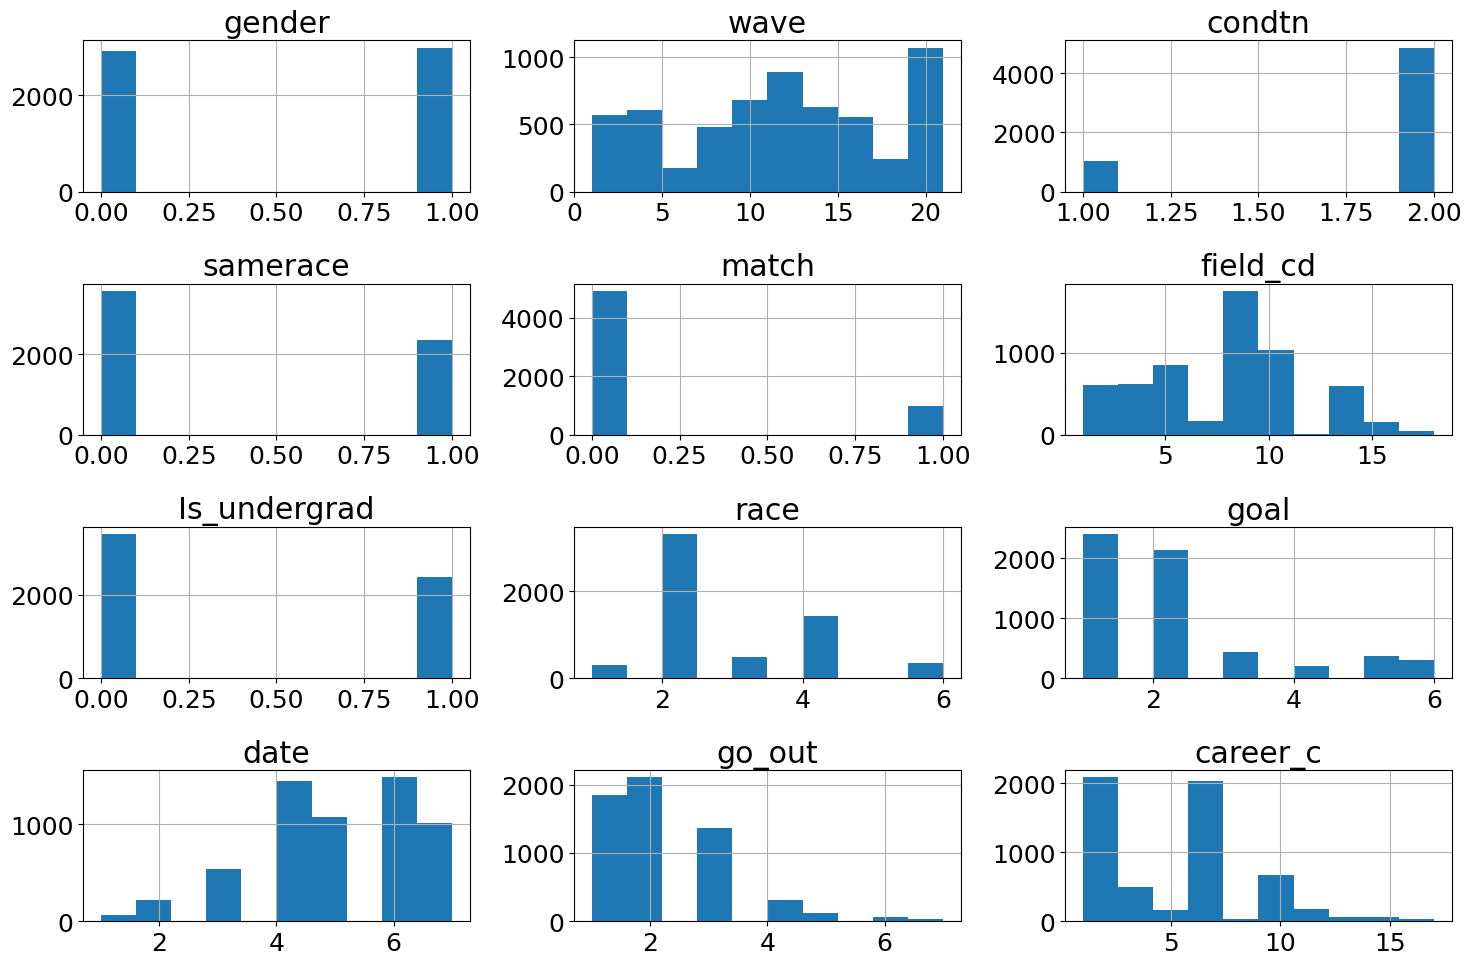

In [164]:
# visualize categorical columns
general_categorical_features = ['gender', 'wave', 'condtn', 'samerace', 'match',
                                'field_cd', 'Is_undergrad', 'race', 'goal', 'date',
                                'go_out', 'career_c']

# calculate number of rows and columns based on the number of features and desired plots per row
num_cols = 3  # number of plots per row
num_rows = -(-len(general_categorical_features) // num_cols)  # ceiling division to ensure enough rows

# plot the histogram thanks to the displot function
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
for i, col in enumerate(general_categorical_features):
    row_index = i // num_cols
    col_index = i % num_cols
    df[col].hist(ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(col)

# remove any empty subplots if the number of plots doesn't fill the entire grid
for i in range(len(general_categorical_features), num_rows*num_cols):
    row_index = i // num_cols
    col_index = i % num_cols
    fig.delaxes(axes[row_index, col_index])

plt.tight_layout()  # adjust layout for better spacing
plt.show()


In [ ]:
df['from'].unique()

array(['Palo Alto, CA', 'Boston, MA', 'Bombay, India', 'Washington, DC',
       'Midwest USA', 'San Francisco', 'India/Venezuela', 'new york city',
       'Maryland', 'Arizona', 'Brooklyn, NY', 'India', 'Siberia', 'china',
       'UK', 'Spain', 'New Jersey', 'New York', 'Texas', 'Atlanta',
       'New York Area/ New Jersey', 'Ohio', 'Greenwich, CT',
       'Tokyo, Japan', 'Canada', 'California (West Coast)', 'Vestal',
       'France', 'California', 'NY', 'Seattle', 'Yugoslavia',
       'Northern New Jersey', 'Albuquerque, NM', 'Austin, TX',
       'New Mexico', 'Russia/Germany', 'California, New Jersey',
       'Azerbaijan', 'England', 'Minneapolis', 'New York City', 'Houston',
       'Philadelphia', 'Chicago', 'Budapest', 'TN', 'spain', 'Germany',
       'Salt Lake City', 'NYC', 'ottawa, canada', 'Miami',
       'Wash DC (4 yrs)', 'New York, NY', 'Florida', 'california',
       'Texas & Boston', 'BEIJING, CHINA', 'Colorado',
       'London & New York', 'San Francisco(home)/Los Angeles

## Data Cleaning

In [165]:
df_parent = df.copy()

In [ ]:
# check how many duplicates we have in df

print(df.duplicated().sum())


0


In [166]:
# get the sum of missing values for each column
columns_with_missing_values = df.columns[df.isnull().any()]
missing_values_sum = df[columns_with_missing_values].isnull().sum()

# print the columns with missing values and their sum
for column, sum in missing_values_sum.items():
  print(f"{column}: {sum}")


positin1: 1318
pid: 8
int_corr: 109
age_o: 65
race_o: 48
pf_o_att: 59
pf_o_sin: 59
pf_o_int: 59
pf_o_fun: 66
pf_o_amb: 73
pf_o_sha: 83
attr_o: 153
sinc_o: 209
intel_o: 220
fun_o: 265
amb_o: 512
shar_o: 787
like_o: 183
prob_o: 235
met_o: 275
age: 63
field: 45
field_cd: 59
undergra: 2442
mn_sat: 3674
tuition: 3365
race: 45
imprace: 58
imprelig: 58
from: 58
zipcode: 720
income: 2862
goal: 58
date: 72
go_out: 58
career: 64
career_c: 100
sports: 58
tvsports: 58
exercise: 58
dining: 58
museums: 58
art: 58
hiking: 58
gaming: 58
clubbing: 58
reading: 58
tv: 58
theater: 58
movies: 58
concerts: 58
music: 58
shopping: 58
yoga: 58
exphappy: 70
expnum: 4627
attr1_1: 58
sinc1_1: 58
intel1_1: 58
fun1_1: 65
amb1_1: 71
shar1_1: 88
attr4_1: 1346
sinc4_1: 1346
intel4_1: 1346
fun4_1: 1346
amb4_1: 1346
shar4_1: 1363
attr2_1: 58
sinc2_1: 58
intel2_1: 58
fun2_1: 58
amb2_1: 65
shar2_1: 65
attr3_1: 81
sinc3_1: 81
fun3_1: 81
intel3_1: 81
amb3_1: 81
attr5_1: 2452
sinc5_1: 2452
intel5_1: 2452
fun5_1: 2452
amb5_1:

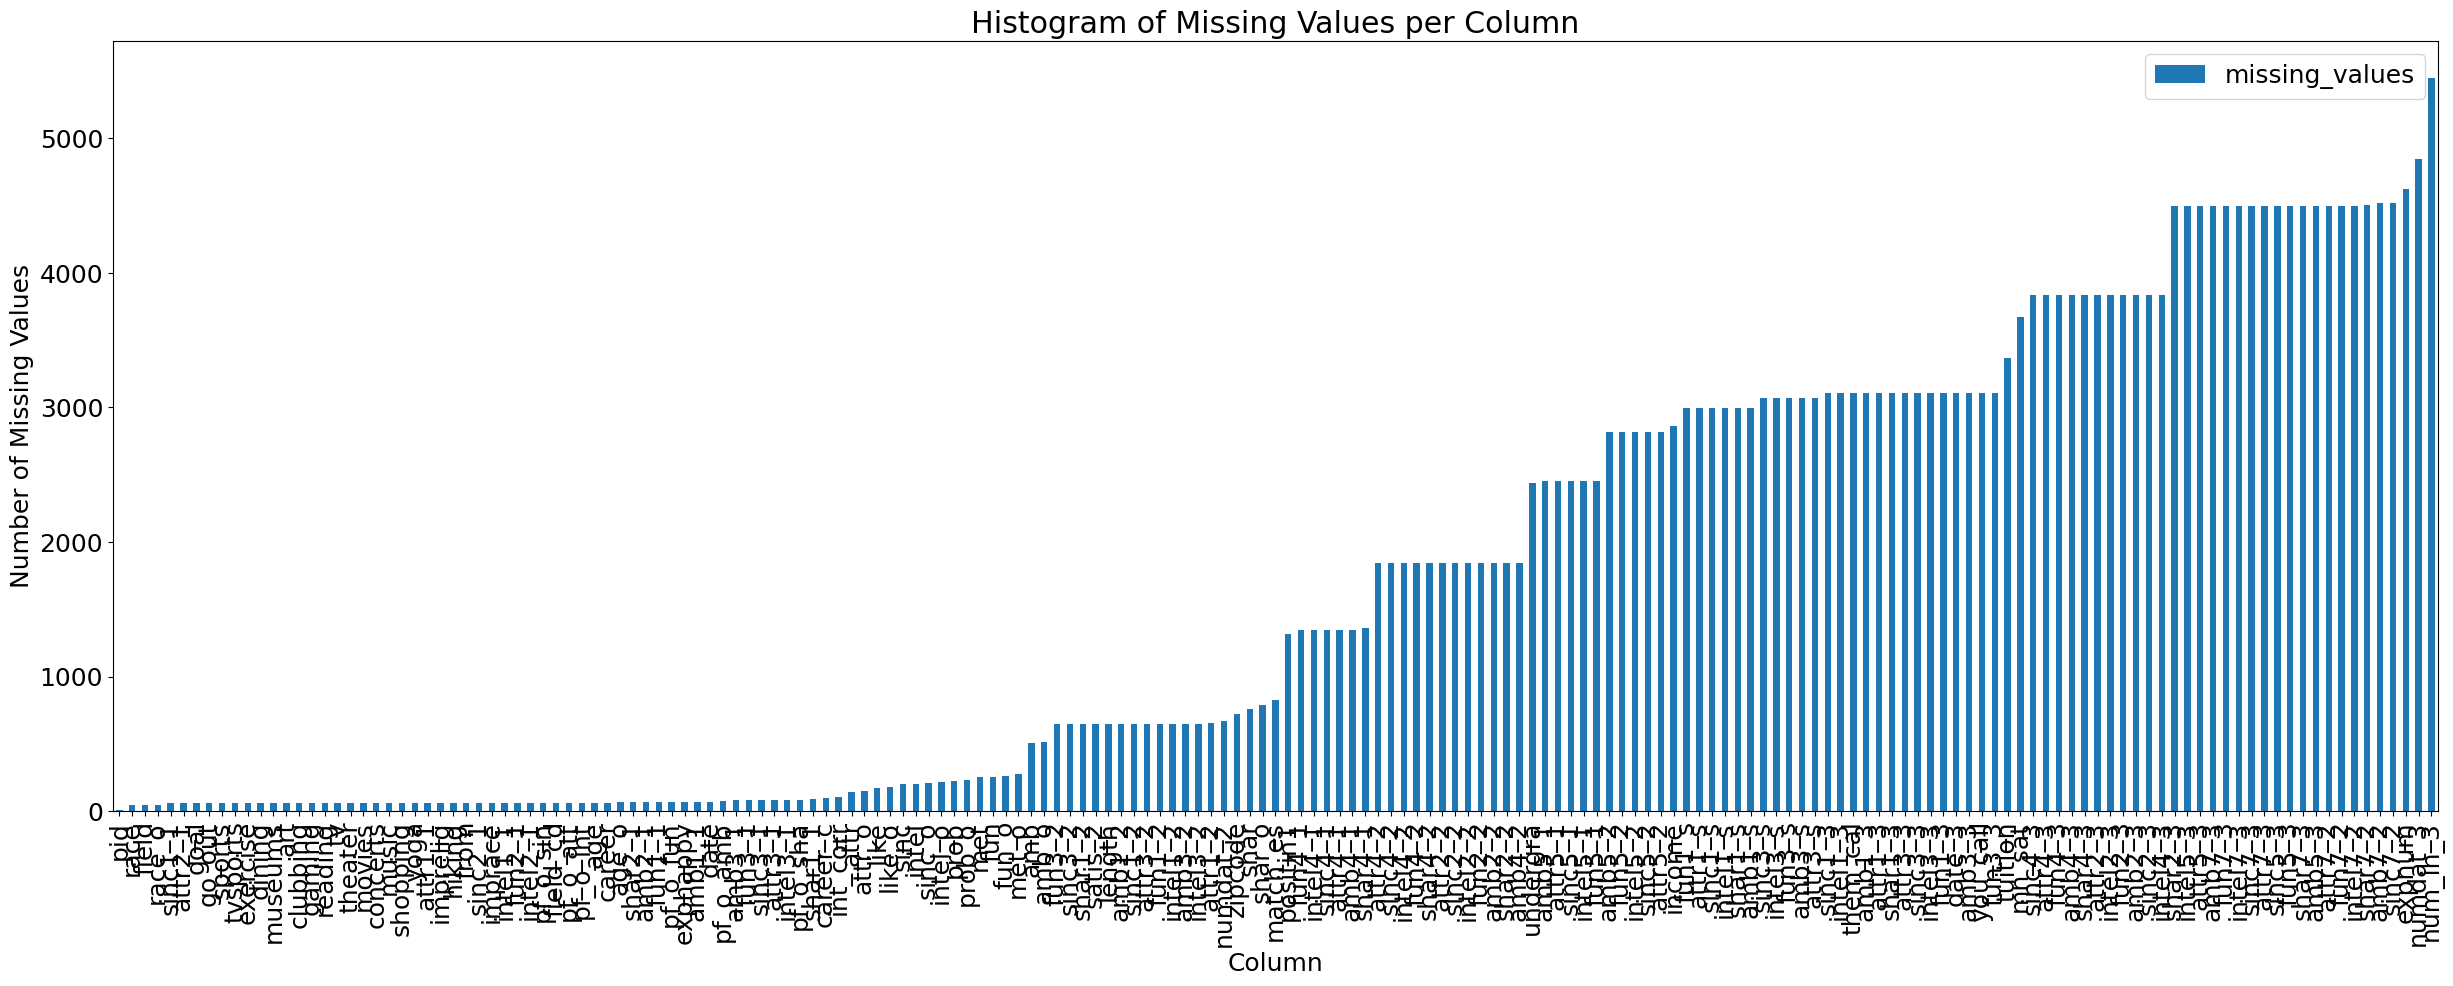

In [167]:
# create hist for missing_values_sum with column names with its sum

df_missing_values = pd.DataFrame({'column': columns_with_missing_values, 'missing_values': missing_values_sum})
df_missing_values.sort_values(by=['missing_values'], inplace=True)
df_missing_values.set_index('column', inplace=True)
df_missing_values.plot(kind='bar', figsize=(30,10))
plt.title('Histogram of Missing Values per Column')
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')
plt.show()


since the whole data contains 5909 data points, I will drop all greater then 2500 missing values

In [168]:
# df_missing_values: get column index names in a list where their missing_values is greater or equal to 3000

to_drop_cols = df_missing_values.loc[df_missing_values['missing_values'] >= 2500].index.to_list()


In [169]:
df.drop(columns=to_drop_cols, inplace=True)

It happened that those columns having a huge amount of missing values are those which collected after 3-4 week of the event. 🧐

field_cd represents field

career_c represennts career

Is_undergrad represennts undergra

**So**, I will drop them

and from because it need further representations.

In [170]:
# drop some categorical values

cat_cols = ['field', 'undergra', 'career', 'from']

df.drop(columns=cat_cols, inplace=True)

In [ ]:
df.head()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,zipcode,income,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,satis_2,length,numdat_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,id,Is_undergrad
0,0,3,2,14,18,2,2.0,14,12,372.0,0,-0.03,0,27.0,2.0,30.00,15.00,15.00,20.00,5.00,15.00,7.0,7.0,7.0,6.0,5.0,NaN,7.0,1.0,2.0,33.0,9.0,3.0,2.0,1.0,NaN,NaN,1.0,6.0,3.0,2.0,3.0,4.0,4.0,10.0,9.0,10.0,1.0,1.0,8.0,7.0,10.0,8.0,10.0,1.0,4.0,10.0,4.0,2.0,40.00,15.00,25.00,5.00,15.00,0.00,55.0,10.0,5.0,15.0,5.0,10.0,70.00,5.00,5.00,15.00,5.00,0.00,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,6.0,5.0,7.0,6.0,6.0,NaN,6.0,4.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,1.0,2.0,60.0,10.0,10.0,10.0,10.0,0.0,45.0,25.0,5.0,25.0,0.0,0.0,65.00,5.00,5.00,25.00,0.00,0.00,10.0,10.0,10.0,9.0,10.0,10.0,9.0,10.0,9.0,10.0,2583,0
1,1,14,1,3,10,2,NaN,8,8,63.0,0,0.21,0,24.0,4.0,5.00,15.00,45.00,25.00,0.00,10.00,3.0,8.0,5.0,3.0,7.0,1.0,1.0,3.0,2.0,22.0,5.0,2.0,8.0,1.0,"2,021",NaN,5.0,6.0,1.0,7.0,8.0,3.0,7.0,10.0,6.0,6.0,7.0,2.0,9.0,5.0,6.0,7.0,7.0,6.0,8.0,8.0,4.0,7.0,21.00,20.00,19.00,20.00,10.00,10.00,NaN,NaN,NaN,NaN,NaN,NaN,30.00,15.00,10.00,20.00,10.00,15.00,7.0,9.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,5.0,8.0,8.0,5.0,7.0,6.0,6.0,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,1.0,3.0,22.0,17.0,17.0,17.0,10.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,7.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6830,1
2,1,14,1,13,10,8,8.0,10,10,331.0,0,0.43,0,34.0,2.0,15.00,15.00,10.00,25.00,10.00,25.00,4.0,8.0,7.0,4.0,7.0,3.0,3.0,2.0,2.0,27.0,5.0,6.0,1.0,1.0,NaN,NaN,1.0,4.0,2.0,7.0,4.0,2.0,7.0,6.0,8.0,8.0,8.0,6.0,6.0,8.0,4.0,10.0,10.0,7.0,7.0,5.0,10.0,2.0,10.00,20.00,25.00,20.00,20.00,5.00,25.0,5.0,20.0,25.0,10.0,15.0,25.00,10.00,20.00,25.00,10.00,10.00,7.0,9.0,7.0,9.0,10.0,7.0,9.0,9.0,7.0,9.0,6.0,5.0,7.0,5.0,7.0,6.0,6.0,5.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,3.0,3.0,15.0,20.0,20.0,15.0,20.0,10.0,25.0,15.0,10.0,25.0,10.0,15.0,15.00,20.00,20.00,20.00,15.00,10.00,7.0,9.0,9.0,8.0,10.0,7.0,9.0,8.0,7.0,9.0,4840,0
3,1,38,2,9,20,18,13.0,6,7,200.0,0,0.72,1,25.0,2.0,13.21,18.87,18.87,16.98,16.98,15.09,5.0,9.0,7.0,5.0,8.0,NaN,7.0,6.0,2.0,31.0,13.0,2.0,4.0,7.0,"10,471","45,300.00",2.0,5.0,4.0,9.0,5.0,5.0,9.0,8.0,7.0,8.0,9.0,3.0,8.0,7.0,4.0,6.0,8.0,7.0,7.0,3.0,5.0,4.0,17.78,17.78,17.78,17.78,13.33,15.56,9.0,7.0,8.0,7.0,7.0,7.0,19.15,17.02,17.02,17.02,14.89,14.89,8.0,8.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,8.0,8.0,9.0,10.0,9.0,9.0,9.0,7.0,2.0,NaN,16.67,18.52,18.52,18.52,12.96,14.81,8.0,1.0,3.0,16.0,20.0,16.0,20.0,14.0,14.0,9.0,7.0,8.0,8.0,7.0,6.0,17.02,19.15,17.02,17.02,17.02,12.77,8.0,9.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,5508,1
4,1,24,2,14,20,6,6.0,20,17,357.0,0,0.33,0,27.0,4.0,15.00,20.00,20.00,20.00,20.00,5.00,4.0,5.0,7.0,5.0,5.0,6.0,4.0,3.0,2.0,27.0,8.0,2.0,9.0,7.0,"66,208","46,138.00",2.0,5.0,2.0,10.0,9.0,10.0,8.0,9.0,9.0,9.0,7.0,4.0,2.0,9.0,6.0,8.0,6.0,7.0,7.0,4.0,2.0,5.0,30.00,15.00,15.00,20.00,5.00,15.00,40.0,15.0,10.0,20.0,0.0,15.0,30.00,10.00,15.00,10.00,20.00,15.00,7.0,8.0,8.0,9.0,8.0,7.0,8.0,8.0,8.0,7.0,8.0,8.0,8.0,7.0,6.0,5.0,6.0,5.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,2.0,40.0,15.0,15.0,15.0,5.0,10.0,45.0,15.0,5.0,15.0,5.0,15.0,40.00,10.00,10.00,10.00,20.00,10.00,7.0,8.0,9.0,9.0,8.0,7.0,7.0,8.0,8.

Now, let's go looking further in the waves of the event 🌊🌊

In [171]:
df['wave'].unique()

array([14,  3, 13,  9,  4, 11, 12, 21,  6, 15,  8, 19,  2,  1,  5, 16,  7,
       18, 20, 17, 10])

checking the columns representing the preferences of the date

In [176]:
# select all columns if has the pattern att or sin or int or fun or amb or sha

selected_cols = [col for col in df.columns if any(pattern in col for pattern in ['att', 'sin', 'int', 'fun', 'amb', 'sha'])]
df[selected_cols].drop(columns=['int_corr','pf_o_att'])


,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,attr,sinc,intel,fun,amb,shar,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2
0,15.00,15.00,20.00,5.00,15.00,7.0,7.0,7.0,6.0,5.0,NaN,40.00,15.00,25.00,5.00,15.00,0.00,55.0,10.0,5.0,15.0,5.0,10.0,70.00,5.00,5.00,15.00,5.00,0.00,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,6.0,5.0,7.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.00,10.00,10.00,10.00,10.00,0.00,45.0,25.0,5.0,25.0,0.0,0.0,65.00,5.00,5.00,25.00,0.00,0.00,10.0,10.0,10.0,9.0,10.0,10.0,9.0,10.0,9.0,10.0
1,15.00,45.00,25.00,0.00,10.00,3.0,8.0,5.0,3.0,7.0,1.0,21.00,20.00,19.00,20.00,10.00,10.00,NaN,NaN,NaN,NaN,NaN,NaN,30.00,15.00,10.00,20.00,10.00,15.00,7.0,9.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,5.0,8.0,8.0,5.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,22.00,17.00,17.00,17.00,10.00,17.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,7.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN
2,15.00,10.00,25.00,10.00,25.00,4.0,8.0,7.0,4.0,7.0,3.0,10.00,20.00,25.00,20.00,20.00,5.00,25.0,5.0,20.0,25.0,10.0,15.0,25.00,10.00,20.00,25.00,10.00,10.00,7.0,9.0,7.0,9.0,10.0,7.0,9.0,9.0,7.0,9.0,6.0,5.0,7.0,5.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,15.00,20.00,20.00,15.00,20.00,10.00,25.0,15.0,10.0,25.0,10.0,15.0,15.00,20.00,20.00,20.00,15.00,10.00,7.0,9.0,9.0,8.0,10.0,7.0,9.0,8.0,7.0,9.0
3,18.87,18.87,16.98,16.98,15.09,5.0,9.0,7.0,5.0,8.0,NaN,17.78,17.78,17.78,17.78,13.33,15.56,9.0,7.0,8.0,7.0,7.0,7.0,19.15,17.02,17.02,17.02,14.89,14.89,8.0,8.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,8.0,8.0,9.0,10.0,9.0,9.0,16.67,18.52,18.52,18.52,12.96,14.81,16.00,20.00,16.00,20.00,14.00,14.00,9.0,7.0,8.0,8.0,7.0,6.0,17.02,19.15,17.02,17.02,17.02,12.77,8.0,9.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
4,20.00,20.00,20.00,20.00,5.00,4.0,5.0,7.0,5.0,5.0,6.0,30.00,15.00,15.00,20.00,5.00,15.00,40.0,15.0,10.0,20.0,0.0,15.0,30.00,10.00,15.00,10.00,20.00,15.00,7.0,8.0,8.0,9.0,8.0,7.0,8.0,8.0,8.0,7.0,8.0,8.0,8.0,7.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,40.00,15.00,15.00,15.00,5.00,10.00,45.0,15.0,5.0,15.0,5.0,15.0,40.00,10.00,10.00,10.00,20.00,10.00,7.0,8.0,9.0,9.0,8.0,7.0,7.0,8.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5904,21.28,17.02,21.28,14.89,8.51,7.0,8.0,6.0,7.0,8.0,3.0,16.00,16.00,20.00,16.00,18.00,14.00,10.0,7.0,8.0,9.0,7.0,9.0,20.00,12.00,16.00,20.00,14.00,18.00,9.0,10.0,8.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,7.0,8.0,10.0,8.0,10.0,7.0,18.87,18.87,18.87,13.21,16.98,13.21,18.18,18.18,18.18,14.55,18.18,12.73,10.0,8.0,8.0,10.0,9.0,9.0,18.87,13.21,15.09,18.87,15.09,18.87,10.0,10.0,10.0,8.0,10.0,NaN,NaN,NaN,NaN,NaN
5905,17.50,20.00,12.50,20.00,12.50,7.0,10.0,8.0,6.0,7.0,2.0,14.71,14.71,14.71,14.71,20.59,20.59,8.0,6.0,4.0,5.0,6.0,7.0,19.51,14.63,19.51,19.51,12.20,14.63,5.0,9.0,7.0,6.0,7.0,NaN,NaN,NaN,NaN,NaN,5.0,6.0,8.0,5.0,5.0,5.0,17.39,15.22,15.22,19.57,17.39,15.22,16.33,18.37,16.33,18.37,16.33,14.29,9.0,8.0,8.0,7.0,8.0,8.0,18.75,16.67,18.75,16.67,14.58,14.58,6.0,9.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
5906,10.00,30.00,10.00,5.00,15.00,7.0,7.0,7.0,6.0,6.0,4.0,7.00,35.00,20.00,20.00,5.00,13.00,18.0,13.0,14.0,10.0,33.0,12.0,50.00,8.00,9.00,17.00,5.00,11.00,6.0,10.0,8.0,9.0,5.0,6.0,10.0,8.0,7.0,6.0,4.0,7.0,9.0,6.0,7.0,NaN,6.00,38.00,16.00,14.00,5.00,21.00,13.00,29.00,12.00,18.00,8.00,20.00,23.0,5.0,10.0,15.0,27.0,20.0,40.00,2.00,12.00,18.00,5.00,23.00,7.0,10.0,9.0,8.0,4.0,6

In [177]:
# select rows where df['wave'] is 6 and 7 and 8 and 9

preferences_in_waves6_7_8_9 = df[df['wave'].isin([6,7,8,9])][selected_cols].drop(columns=['int_corr','pf_o_att'])


Since, it is provided in the data docs, that in 6, 7, 8 and 9 waves, preferences scale from 1 - 10

I will drop rows where they don’t apply that condition.

In [179]:
# select all rows which has any value greater than 10 or less than zero

greater_than_10 = preferences_in_waves6_7_8_9[preferences_in_waves6_7_8_9 > 10].any(axis=1)
less_than_zero = preferences_in_waves6_7_8_9[preferences_in_waves6_7_8_9 < 0].any(axis=1)
noisy_preferences_in_waves6_7_8_9 =  preferences_in_waves6_7_8_9[greater_than_10 | less_than_zero]


I am going to try what if I dropped Time2 features as they are collected after the event already

In [180]:
# select all in df except in noisy_preferences_in_waves6_7_8_9

df = df.drop(noisy_preferences_in_waves6_7_8_9.index)


In [ ]:
df.columns

Index(['gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1',
       'order', 'partner', 'pid',
       ...
       'intel3_2', 'fun3_2', 'amb3_2', 'attr5_2', 'sinc5_2', 'intel5_2',
       'fun5_2', 'amb5_2', 'id', 'Is_undergrad'],
      dtype='object', length=136)

I also dropped featuers collected after the event.

In [181]:
# find columns in df.columns using regex where the last 2 letters of the name of it is _2

import re
time2_cols = [col for col in df.columns if re.search(r'_2$', col)]

df.drop(columns=time2_cols, inplace=True)

In [182]:
df = df.replace(r'[^\w\s]', '', regex=True)

In [184]:
columns_with_missing_values = df.columns[df.isnull().any()]
missing_values_sum = df[columns_with_missing_values].isnull().sum()

# print the columns with missing values and their sum
for column, sum in missing_values_sum.items():
  print(f"{column}: {sum}")

positin1: 1318
pid: 8
int_corr: 102
age_o: 63
race_o: 46
pf_o_att: 57
pf_o_sin: 57
pf_o_int: 57
pf_o_fun: 64
pf_o_amb: 71
pf_o_sha: 81
attr_o: 148
sinc_o: 192
intel_o: 199
fun_o: 226
amb_o: 422
shar_o: 625
like_o: 161
prob_o: 204
met_o: 242
age: 58
field_cd: 54
race: 40
imprace: 53
imprelig: 53
zipcode: 563
income: 2432
goal: 53
date: 67
go_out: 53
career_c: 95
sports: 53
tvsports: 53
exercise: 53
dining: 53
museums: 53
art: 53
hiking: 53
gaming: 53
clubbing: 53
reading: 53
tv: 53
theater: 53
movies: 53
concerts: 53
music: 53
shopping: 53
yoga: 53
exphappy: 65
attr1_1: 53
sinc1_1: 53
intel1_1: 53
fun1_1: 60
amb1_1: 66
shar1_1: 83
attr4_1: 1341
sinc4_1: 1341
intel4_1: 1341
fun4_1: 1341
amb4_1: 1341
shar4_1: 1358
attr2_1: 53
sinc2_1: 53
intel2_1: 53
fun2_1: 53
amb2_1: 60
shar2_1: 60
attr3_1: 76
sinc3_1: 76
fun3_1: 76
intel3_1: 76
amb3_1: 76
attr5_1: 1364
sinc5_1: 1364
intel5_1: 1364
fun5_1: 1364
amb5_1: 1364
attr: 138
sinc: 183
intel: 183
fun: 215
amb: 414
shar: 605
like: 156
prob: 198
m

# Preprocessing

For in ML modeling
- drop ids as they are not trainable
- scaling
- handle unbalanced classes

In [185]:
# drop ids

ids_cols = ['idg', 'pid', 'id','partner']
df.drop(columns=ids_cols, inplace=True)

In [186]:
# thought it doesn't matter the position of people in seeing them differently to date or not
df.drop(columns=['wave','round','position','positin1'], inplace=True)

In [188]:
df.shape

(4821, 98)

In [201]:
columns_with_missing_values = df.columns[df.isnull().any()]
missing_values_sum = df[columns_with_missing_values].isnull().sum()

# print the columns with missing values and their sum
for column, sum in missing_values_sum.items():
  print(f"{column}: {sum}")

int_corr: 102
age_o: 63
race_o: 46
pf_o_att: 57
pf_o_sin: 57
pf_o_int: 57
pf_o_fun: 64
pf_o_amb: 71
pf_o_sha: 81
attr_o: 148
sinc_o: 192
intel_o: 199
fun_o: 226
amb_o: 422
shar_o: 625
like_o: 161
prob_o: 204
met_o: 242
age: 58
field_cd: 54
race: 40
imprace: 53
imprelig: 53
zipcode: 563
income: 2432
goal: 53
date: 67
go_out: 53
career_c: 95
sports: 53
tvsports: 53
exercise: 53
dining: 53
museums: 53
art: 53
hiking: 53
gaming: 53
clubbing: 53
reading: 53
tv: 53
theater: 53
movies: 53
concerts: 53
music: 53
shopping: 53
yoga: 53
exphappy: 65
attr1_1: 53
sinc1_1: 53
intel1_1: 53
fun1_1: 60
amb1_1: 66
shar1_1: 83
attr4_1: 1341
sinc4_1: 1341
intel4_1: 1341
fun4_1: 1341
amb4_1: 1341
shar4_1: 1358
attr2_1: 53
sinc2_1: 53
intel2_1: 53
fun2_1: 53
amb2_1: 60
shar2_1: 60
attr3_1: 76
sinc3_1: 76
fun3_1: 76
intel3_1: 76
amb3_1: 76
attr5_1: 1364
sinc5_1: 1364
intel5_1: 1364
fun5_1: 1364
amb5_1: 1364
attr: 138
sinc: 183
intel: 183
fun: 215
amb: 414
shar: 605
like: 156
prob: 198
met: 225
match_es: 372


In [202]:
# get columns only in missing_values_sum as a list

missing_values_list = missing_values_sum.index.to_list()


In [203]:
numberical_features = ['int_corr','age_o','age','income','match_es']


In [208]:
categorical_features = [ i for i in missing_values_list if i not in numberical_features]

In [205]:
categorical_features

['race_o',
 'pf_o_att',
 'pf_o_sin',
 'pf_o_int',
 'pf_o_fun',
 'pf_o_amb',
 'pf_o_sha',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'amb_o',
 'shar_o',
 'like_o',
 'prob_o',
 'met_o',
 'field_cd',
 'race',
 'imprace',
 'imprelig',
 'zipcode',
 'goal',
 'date',
 'go_out',
 'career_c',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'exphappy',
 'attr1_1',
 'sinc1_1',
 'intel1_1',
 'fun1_1',
 'amb1_1',
 'shar1_1',
 'attr4_1',
 'sinc4_1',
 'intel4_1',
 'fun4_1',
 'amb4_1',
 'shar4_1',
 'attr2_1',
 'sinc2_1',
 'intel2_1',
 'fun2_1',
 'amb2_1',
 'shar2_1',
 'attr3_1',
 'sinc3_1',
 'fun3_1',
 'intel3_1',
 'amb3_1',
 'attr5_1',
 'sinc5_1',
 'intel5_1',
 'fun5_1',
 'amb5_1',
 'attr',
 'sinc',
 'intel',
 'fun',
 'amb',
 'shar',
 'like',
 'prob',
 'met',
 'length']

# Building a Pipeline

In [224]:
X = df.drop(columns='match')
y = df['match']

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [226]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# Define full preprocessing pipeline
preprocessing_pipeline = ColumnTransformer([
    ('numerical', numerical_pipeline, numberical_features),
    ('categorical', categorical_pipeline, categorical_features)
])

I will not use the following structure



```
full_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('sampling', SMOTE()),  # SMOTE for oversampling minority class
    ('model', XGBClassifier())  
])

```

because the sklearn doesn’t  support the oversampling techniques from imbalanced library and I need to use it becuase data is highly unbalanced; I need to fit_transform training, transform testing for preprocessing, oversample training only and then finally fit the model.  

In [227]:
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train[numberical_features + categorical_features])

In [228]:
X_test_preprocessed = preprocessing_pipeline.transform(X_test[numberical_features + categorical_features])

In [229]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

## XGBoost

trial 1

In [ ]:
from xgboost import XGBClassifier


xgb_model = XGBClassifier()

# fit the model to the training data
xgb_model.fit(X_train_resampled, y_train_resampled)

# evaluate the model on the testing data
accuracy = xgb_model.score(X_test_preprocessed, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8764805414551607


AUC Score: 0.8783092064588358


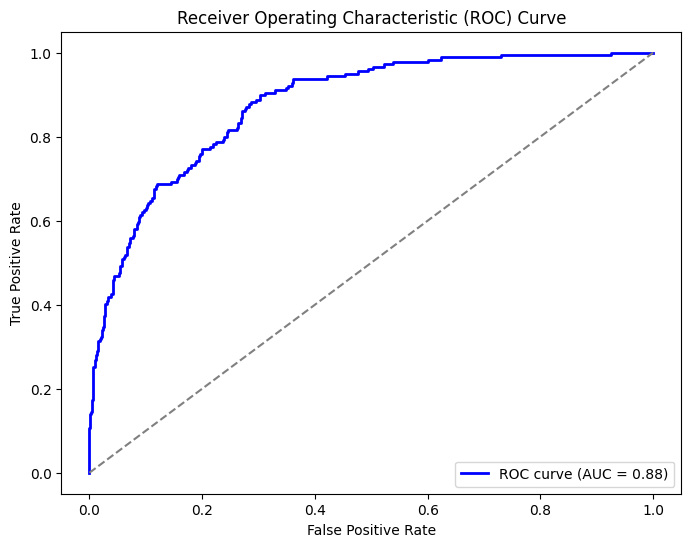

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


# predict probabilities on the testing data
y_proba = xgb_model.predict_proba(X_test_preprocessed)[:, 1]

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# calculate AUC score
auc_score = roc_auc_score(y_test, y_proba)
print("AUC Score:", auc_score)

# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Grid Search

We can tune the hyperparameters (including different preprocessing configurations using cross-validation and grid-search). Grid search tests all possible combination of hyperparameters by the options and ranges you specified.

trial 2

In [ ]:
# define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='roc_auc')

# fit the GridSearchCV object to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.7}
Best score:  0.9806784518629955


**results**
Best set of hyperparameters:  {'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.7}
Best score:  0.9806784518629955
cons: it is expensive and takes so muxh time I will try another technique.

trial 3: Grid Search with validation set

### Grid Search with validation set

Cross-validation is expensive. We can supply our own validation set

In [232]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import PredefinedSplit

# Further split the original training set to a train and a validation set
X_train_resampled_df = pd.DataFrame(X_train_resampled)

X_train2, X_val, y_train2, y_val = train_test_split(X_train_resampled_df, y_train_resampled, train_size=0.8,stratify=y_train_resampled,
                                                    random_state = 42)

# Create a list where train data indices are -1 and validation data indices are 0
# X_train2 (new training set), X_train
split_index = [-1 if x in X_train2.index else 0 for x in X_train_resampled_df.index]

# Use the list to create PredefinedSplit
pds = PredefinedSplit(test_fold = split_index)

grid_search_2 = GridSearchCV(xgb_model, param_grid=param_grid, cv=pds, verbose=1, n_jobs=2,
    scoring='roc_auc')

# here we still use X_train; but the grid search model
# will use our predefined split internally to determine
# which sample belongs to the validation set
grid_search_2.fit(X_train_resampled, y_train_resampled)

print('best score {}'.format(grid_search_2.best_score_))
print('best score {}'.format(grid_search_2.best_params_))

Fitting 1 folds for each of 27 candidates, totalling 27 fits
best score 0.9883517526287035
best score {'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.7}


Slightly better score!

### Random Search

Grid search (global optimal) is expensive when you specify a large search space. Alternatively, random search CV give you local optimal (may be good enough and even more generalizable)

trial 4

In [233]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import PredefinedSplit

grid_search_3 = RandomizedSearchCV(
    xgb_model, param_grid, cv=pds, verbose=1, n_jobs=2,
    # number of random trials
    n_iter=10,
    scoring='roc_auc')

grid_search_3.fit(X_train_resampled, y_train_resampled)

print('best score {}'.format(grid_search_3.best_score_))
print('best score {}'.format(grid_search_3.best_params_))

Fitting 1 folds for each of 10 candidates, totalling 10 fits
best score 0.9854354973209749
best score {'subsample': 1, 'max_depth': 5, 'learning_rate': 0.1}


### BayesSearchCV

trial 5


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [ ]:
search_space =  {
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'min_child_weight': (0, 10),
        'max_depth': (0, 50),
        'max_delta_step': (0, 20),
        'subsample': (0.01, 1.0, 'uniform'),
        'colsample_bytree': (0.01, 1.0, 'uniform'),
        'colsample_bylevel': (0.01, 1.0, 'uniform'),
        'gamma': (1e-9, 0.5, 'log-uniform'),
        'n_estimators': (50, 100),
    }

bayes_search = BayesSearchCV(xgb_model, search_space, n_iter=5,
                             random_state=0,verbose=1,cv=pds)

bayes_search.fit(X_train_resampled, y_train_resampled)

print('best score {}'.format(bayes_search.best_score_))
print('best score {}'.format(bayes_search.best_params_))

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
best score 0.9349489795918368
best score OrderedDict([('colsample_bylevel', 0.5356545233026259), ('colsample_bytree', 0.6793187137881445), ('gamma', 0.00026117611625153195), ('learning_rate', 0.19649879077896729), ('max_delta_step', 17), ('max_depth', 49), ('min_child_weight', 1), ('n_estimators', 50), ('subsample', 0.5901747412959061)])


**check feature importance**

In [ ]:
len(xgb_model.feature_importances_)

92

Most important features:
     Feature  Importance
18    shar_o    0.158656
82       fun    0.071887
76  intel5_1    0.066048
17     amb_o    0.044213
79      attr    0.028727
..       ...         ...
64   sinc2_1    0.003250
69   attr3_1    0.003103
49      yoga    0.002983
61    amb4_1    0.002964
90   sinc1_s    0.002951

[92 rows x 2 columns]


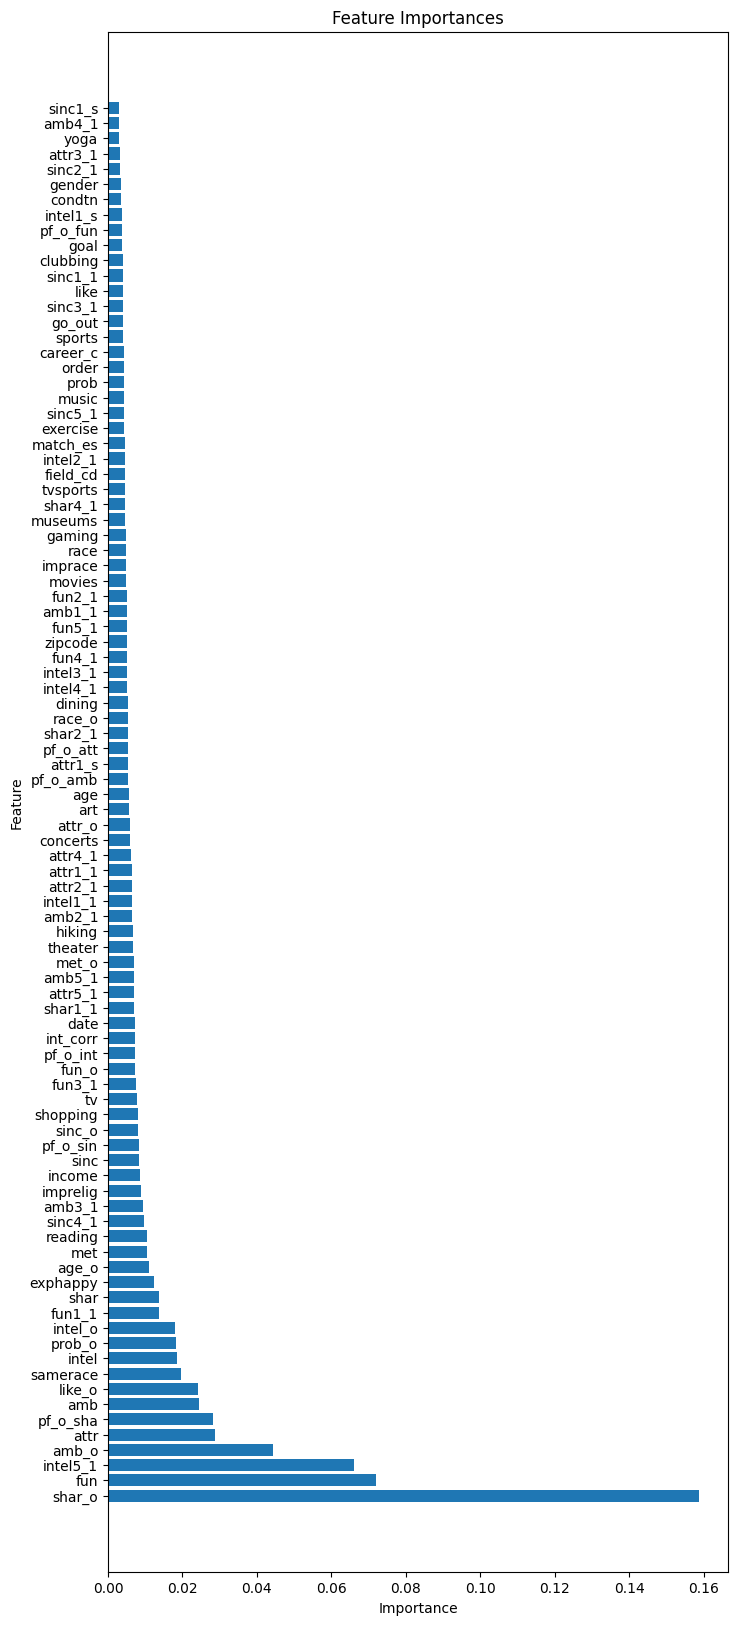

In [ ]:
# get feature importances
feature_importances = xgb_model.feature_importances_

# create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns[:92], 'Importance': feature_importances})

# sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# print the most important features
print("Most important features:")
print(feature_importance_df)

# plot feature importances
plt.figure(figsize=(8, 20))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


### Train with data after PCA

I am trying to check what if data has less features.

trial 6

In [ ]:
# pca using another library


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_preprocessed)


model = pca(n_components=2)

# fit and transform
results = model.fit_transform(X=X_train_scaled, row_labels=y_train_resampled)

# plot the explained variance
fig, ax = model.plot()

# scatter the first two PCs
fig, ax = model.scatter()

# create a biplot
fig, ax = model.biplot(n_feat=4)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(model.results['topfeat'])

     PC feature   loading  type
0   PC1      83 -0.245464  best
1   PC2      49  0.313567  best
2   PC2       1 -0.055225  weak
3   PC2       2 -0.049388  weak
4   PC1       3  0.026289  weak
..  ...     ...       ...   ...
87  PC2      88 -0.082848  weak
88  PC2      89 -0.046105  weak
89  PC2      90 -0.176281  weak
90  PC2      91 -0.170669  weak
91  PC1      92 -0.019698  weak

[92 rows x 4 columns]


In [ ]:
# that one from PCA sklearn

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_preprocessed)


pca = PCA()


X_transformed = pca.fit_transform(X_train_scaled)

check what is the difference if I train with the transformed data by the PCA

In [ ]:
xgb_model_2 = XGBClassifier()

# fit the model to the training data
xgb_model_2.fit(X_transformed, y_train_resampled)

# evaluate the model on the testing data
accuracy = xgb_model.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8485617597292724


In [ ]:
y_proba = xgb_model_2.predict_proba(X_test_scaled)[:, 1]

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# calculate AUC score
auc_score = roc_auc_score(y_test, y_proba)
print("AUC Score:", auc_score)

AUC Score: 0.5929529846215542


Not good compated to the previous experiment, where we didn’t use dimentionality reduction algorithm.

I will try tp use another algorithm.

## SVM

trial 7

In [150]:
# import svm from sklean

from sklearn import svm
clf = svm.SVC(probability=True)
clf.fit(X_train_resampled, y_train_resampled)


SVC(probability=True)

In [152]:
# calcute the accuracy and roc of the clf model

accuracy = clf.score(X_test_preprocessed, y_test)
print("Accuracy:", accuracy)

# predict probabilities on the testing data
y_proba = clf.predict_proba(X_test_preprocessed)[:, 1]

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# calculate AUC score
auc_score = roc_auc_score(y_test, y_proba)
print("AUC Score:", auc_score)


Accuracy: 0.7859560067681896
AUC Score: 0.5174198076162573


I will try to scale data (that was before adding a scaling step in the preprocessing pipeline)

trial 8

In [157]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_preprocessed)

clf_2 = svm.SVC(probability=True)
clf_2.fit(X_train_scaled, y_train_resampled)

SVC(probability=True)

In [158]:
# calcute the accuracy and roc of the clf model

accuracy = clf_2.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

# Predict probabilities on the testing data
y_proba = clf_2.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_proba)
print("AUC Score:", auc_score)


Accuracy: 0.8485617597292724
AUC Score: 0.8606638186000657


Wow! what a great difference after scaling.

I will try to drop highly correlated features from data

trial 9

In [239]:
# calculate pairwise correlations
correlation_matrix = X.corr()

# identify highly correlated features
highly_correlated = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:  # Threshold for high correlation
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            highly_correlated.add((feature_i, feature_j))

# choose removal strategy
features_to_drop = set()
for pair in highly_correlated:
    feature_i, feature_j = pair
    features_to_drop.add(feature_i)  # remove feature_i


In [242]:
list(features_to_drop)

['attr5_1', 'art', 'fun5_1']

In [243]:
X.drop(columns=list(features_to_drop), inplace=True)

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [250]:

categorical_features_new = [x for x in categorical_features if x not in list(features_to_drop)]


In [254]:
preprocessing_pipeline = ColumnTransformer([
    ('numerical', numerical_pipeline, numberical_features),
    ('categorical', categorical_pipeline, categorical_features_new)
])

In [255]:
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train[numberical_features + categorical_features_new])
X_test_preprocessed = preprocessing_pipeline.transform(X_test[numberical_features + categorical_features_new])

In [256]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

In [257]:
xgb_model = XGBClassifier()

# fit the model to the training data
xgb_model.fit(X_train_resampled, y_train_resampled)

# evaluate the model on the testing data
accuracy = xgb_model.score(X_test_preprocessed, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8642487046632125


No significant change :/

# Kaggle Validation Set

This part for submitting predictions in the Kaggle leaderboard

In [ ]:
!unzip /content/test.csv.zip

Archive:  /content/test.csv.zip
  inflating: test.csv                


In [218]:
val_df = pd.read_csv('/content/test.csv')

In [ ]:
val_df.head()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id,Is_undergrad
0,0,5,2,2,16,3,NaN,13,13,52.0,-0.13,0,21.0,2.0,15.00,20.00,15.00,30.00,5.00,15.00,7.0,7.0,6.0,6.0,6.0,5.0,5.0,2.0,2.0,21.0,Psychology,3.0,NaN,NaN,NaN,4.0,9.0,6.0,Hong Kong,0,NaN,1.0,1.0,1.0,psychologist,3.0,2.0,2.0,3.0,9.0,7.0,6.0,6.0,7.0,7.0,10.0,9.0,10.0,10.0,10.0,10.0,10.0,3.0,5.0,3.0,10.0,20.0,40.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,40.00,5.00,20.00,20.00,5.00,10.00,5.0,8.0,6.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6.0,6.0,5.0,7.0,5.0,6.0,6.0,5.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,10.00,10.00,30.00,20.00,10.00,20.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,6.0,7.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,25.0,10.0,30.0,15.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,8.0,6.0,8.0,NaN,NaN,NaN,NaN,NaN,934,1
1,0,33,2,14,18,6,6.0,4,8,368.0,0.12,0,24.0,6.0,20.00,10.00,25.00,20.00,10.00,15.00,7.0,9.0,8.0,8.0,7.0,7.0,6.0,7.0,2.0,27.0,education,9.0,wellesley college,134100,2550400,4.0,10.0,10.0,atlanta ga,30071,3622300,1.0,4.0,2.0,education,2.0,2.0,6.0,10.0,10.0,10.0,10.0,8.0,1.0,7.0,10.0,6.0,10.0,8.0,7.0,7.0,8.0,1.0,1.0,NaN,15.0,20.0,20.0,20.0,20.0,5.0,15.0,20.0,15.0,20.0,10.0,20.0,60.00,0.00,5.00,20.00,0.00,15.00,6.0,10.0,7.0,7.0,6.0,7.0,7.0,6.0,6.0,6.0,4.0,8.0,8.0,9.0,NaN,8.0,7.0,6.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,20.00,10.00,30.00,20.00,15.00,15.00,25.0,15.0,15.0,20.0,5.0,20.0,30.00,10.00,10.00,30.00,0.00,20.00,6.0,7.0,6.0,6.0,6.0,6.0,7.0,6.0,5.0,5.0,0.0,2.0,1.0,1.0,1.0,10.0,20.0,30.0,15.0,20.0,5.0,20.0,20.0,30.0,15.0,15.0,0.0,20.0,20.0,15.0,20.0,5.0,20.0,30.0,10.0,0.0,30.0,0.0,30.0,6.0,8.0,7.0,7.0,8.0,6.0,7.0,6.0,5.0,5.0,6539,0
2,1,6,2,9,20,10,16.0,15,19,212.0,0.11,0,27.0,3.0,14.29,18.37,18.37,16.33,18.37,14.29,6.0,7.0,8.0,7.0,8.0,7.0,6.0,6.0,2.0,27.0,MBA,8.0,NaN,NaN,NaN,2.0,7.0,1.0,San Francisco,10021,5508000,2.0,5.0,3.0,Consulting,7.0,2.0,1.0,2.0,7.0,7.0,5.0,3.0,5.0,1.0,13.0,6.0,6.0,7.0,6.0,5.0,2.0,1.0,6.0,NaN,7.5,17.5,20.0,22.5,12.5,20.0,10.0,6.0,6.0,10.0,10.0,8.0,19.57,17.39,15.22,17.39,17.39,13.04,5.0,10.0,9.0,9.0,10.0,NaN,NaN,NaN,NaN,NaN,9.0,8.0,9.0,9.0,9.0,9.0,7.0,6.0,2.0,NaN,13.21,18.87,18.87,18.87,16.98,13.21,6.0,10.0,10.0,9.0,10.0,7.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,14.81,18.52,18.52,18.52,16.67,12.96,10.0,8.0,8.0,8.0,8.0,8.0,18.18,18.18,12.73,16.36,16.36,18.18,6.0,10.0,10.0,9.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [219]:
val_df['Is_undergrad'] = val_df['undergra'].apply(lambda x: 1 if pd.isna(x) == True else 0)

In [220]:
val_df = val_df.replace(r'[^\w\s]', '', regex=True)

In [221]:
new_val_df = val_df[X.columns]

In [235]:
new_val_df_preprocessed = preprocessing_pipeline.transform(new_val_df[numberical_features + categorical_features])

In [237]:
submission = pd.DataFrame()

submission['id'] = val_df['id']

submission['match'] = grid_search_3.predict_proba(new_val_df_preprocessed)[:,1]

submission.to_csv('sample_submission_walkthrough_grid_search_3.csv', index=False)